# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np


def linan(line1: str, line2: str):
    try:
        a11, a12, b1 = line1.split()
        a21, a22, b2 = line2.split()

        M1 = np.array([[float(a11), float(a12)], [float(a21), float(a22)]])
        V1 = np.array([float(b1), float(b2)])

        ans = np.linalg.solve(M1, V1)
        print(ans[0], ans[1])
    except Exception as ex:
        print(ex)


linan("1 2 4", "1 3 5.5")


1.0 1.5


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
import numpy as np

def decorate_matrix(n: int):
    if n <= 0:
        raise ValueError("n must be greater or equal than 0")
    x = np.eye(n, k=n - 1)
    x[0, :] = 1
    x[n - 1, :] = 1
    x[:, 0] = 1
    x[:, n - 1] = 1
    return x

print(decorate_matrix(5))

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
import numpy as np
from scipy.optimize import minimize

def find_min(a: int, b: int):
    def f(x: float):
        return (x + a) ** 2 - b

    def g(x: float):
        return np.abs((x + a) ** 2 - b)

    f_min = minimize(f, np.array(0), method='Powell')["x"]
    g_min = minimize(g, np.array(0), method='Powell')["x"]
    return float('{:.2}'.format(f_min)),float('{:.2}'.format(g_min))

print(find_min(3, 4))

(-3.0, -1.0)


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

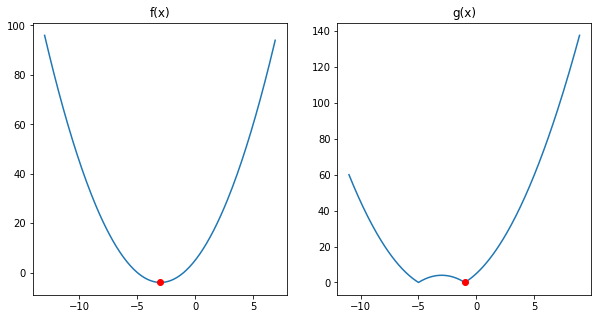

(-3.0, -1.0)


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def find_min(a: int, b: int):
    def f(x: float):
        return (x + a) ** 2 - b

    def g(x: float):
        return np.abs((x + a) ** 2 - b)

    f_min = minimize(f, np.array(0), method='Powell')["x"]
    g_min = minimize(g, np.array(0), method='Powell')["x"]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # данные
    x1 = np.arange(f_min - 10, f_min + 10, 0.1)
    y1 = [f(i) for i in x1]
    x2 = np.arange(g_min - 10, g_min + 10, 0.1)
    y2 = [g(i) for i in x2]
    # построение
    ax1.plot(x1, y1)
    ax1.plot(f_min, f(f_min), 'ro')
    ax1.set_title("f(x)")
    ax2.plot(x2, y2)
    ax2.plot(g_min, g(g_min), 'ro')
    ax2.set_title("g(x)")
    plt.show()
    return float('{:.2}'.format(f_min)), float('{:.2}'.format(g_min))


print(find_min(3, 4))


# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
import numpy as np


def solve():
    A = 0
    B = 0
    C = 0
    for _ in range(10000):# повторяем 10 000 раз для точности оценки 
        success = 0
        for _ in range(1000): # 1000 человек
            a_count = 0
            for i in range(10): # 10 раз подряд
                if i > 0 and 0 < a_count < i:
                    break
                a = np.random.randint(2) # бросают монету
                a_count += a
            if a_count == 10 or a_count == 0: # если 10 раз выпала решка(1) или орел (0)
                success = 1 
            if success == 1:
                A += 1 # то да 1 из 1000 точно везунчик
                break

        success = 0
        for _ in range(1000):# 1000 человек
            a = np.random.randint(2)
            count = 0
            for i in range(10):# 10 раз подряд
                if i == 3 and count == 0:
                    break
                a_prev = a
                a = np.random.randint(2) # бросают монету
                if a_prev == a:
                    count += 1
                else:
                    count = 0
                if count == 8:# если 8 раз выпала решка(1) или орел (0)
                    success += 1
                    break
            if success == 1:
                B += 1 # то да 1 из 1000 точно везунчик
                break

        success = 0
        for _ in range(1000):# 1000 человек
            a_count = 0
            for i in range(10):# 10 раз подряд
                if i > 0 and 0 < a_count < i:
                    break
                a = np.random.randint(2) # бросают монету
                a_count += a
            if a_count == 10 or a_count == 0: # если 10 раз выпала решка(1) или орел (0)
                success += 1
            if success == 4:
                break
        if success == 3:# и их ровно 3 
            C += 1 # значит из 1000 человек у нас ровно 3 везунчика
    print('Вероятность того, что хотя бы у одного человека монетка выпала'
          ' 10 раз подряд той же самой стороной (орлом или решкой)', A / 10000)
    print('Вероятность того, что хотя бы у одного человека монетка выпала '
          '  8 раз подряд той же самой стороной (орлом или решкой)', B / 10000)
    print('Вероятность того, что ровно у троих человек из 1000 монетка выпала'
          ' 10 раз подряд той же самой стороной (орлом или решкой)', C / 10000)


solve()


Вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой) 0.8615
Вероятность того, что хотя бы у одного человека монетка выпала   8 раз подряд той же самой стороной (орлом или решкой) 0.9996
Вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой) 0.176
